In [10]:
# PLOTS THE NIRISS BACKGROUND MODELS FROM EACH PIPELINE
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from astropy.table import Table
from scipy.interpolate import interp1d

sys.path.append('./scripts')
from utils import load_plt_params, pipeline_dictionary, convolve_model
from utils2 import bin_at_resolution

# set the matplotlib parameters
COLOR = '#FFECD6'
#COLOR='k'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.size'] = 20
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.rcParams['xtick.major.width'] = 3
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['xtick.major.size']  = 10 #12
plt.rcParams['ytick.major.size']  = 10 #12

plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.minor.size']  = 6
plt.rcParams['ytick.minor.size']  = 6

plt.rcParams['axes.linewidth'] = 3

plt.rcParams['text.color'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['axes.spines.top'] = True
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['axes.edgecolor'] = COLOR
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['legend.facecolor'] = 'none'


pipeline_dict = pipeline_dictionary()


sys.path.append('/Users/belugawhale/Documents/GitHub/nirhiss/')
from src.nirhiss.utils import get_MAD_sigma

from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

custom_colors = ['#8D697A','#FFD4A3', 
                 '#FFAA5E', '#D08159',  
                 '#544E68','#203C56', '#0D2B45', '#01060f']

pmap = LinearSegmentedColormap.from_list('', custom_colors)

plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

/var/folders/9s/jb487nv52hs8n0q5ftmb1lk80000gn/T/ipykernel_55084/3735572471.py:105: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('/Users/belugawhale/Documents/niriss_real/wasp39/aas_figures/transmission_spectra_{}.png'.format(x),
/var/folders/9s/jb487nv52hs8n0q5ftmb1lk80000gn/T/ipykernel_55084/3735572471.py:105: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('/Users/belugawhale/Documents/niriss_real/wasp39/aas_figures/transmission_spectra_{}.png'.format(x),
/var/folders/9s/jb487nv52hs8n0q5ftmb1lk80000gn/T/ipykernel_55084/3735572471.py:105: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterize" which is no longer supported as of 3.3 and will become an error two minor releases later

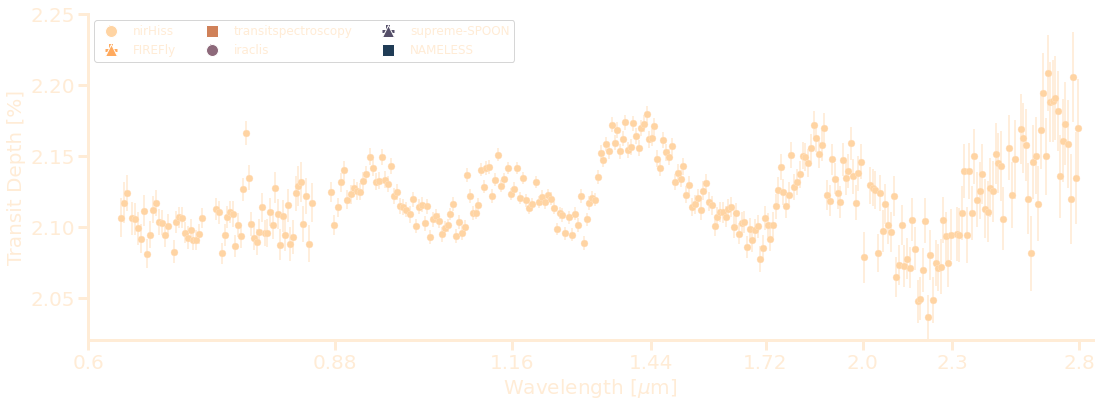

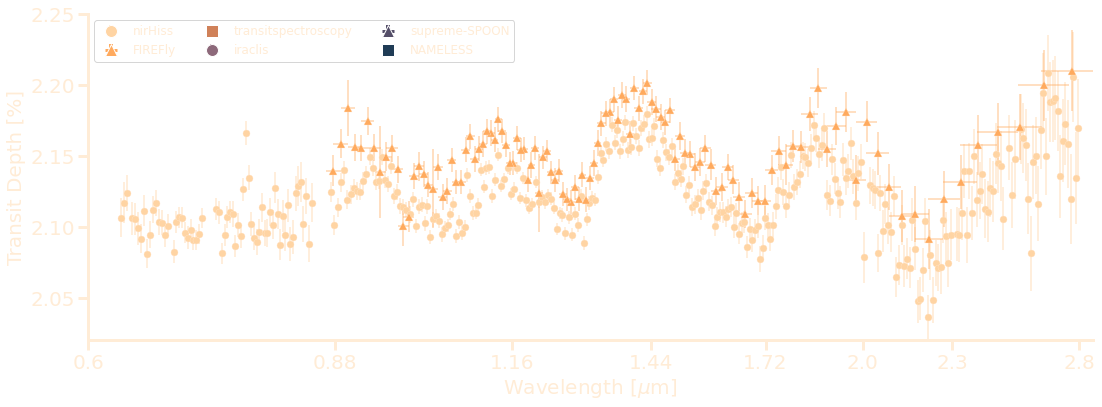

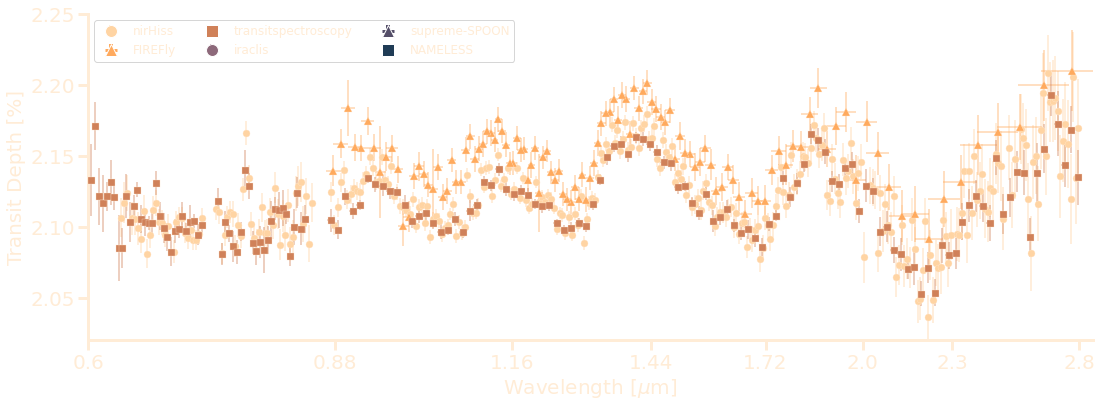

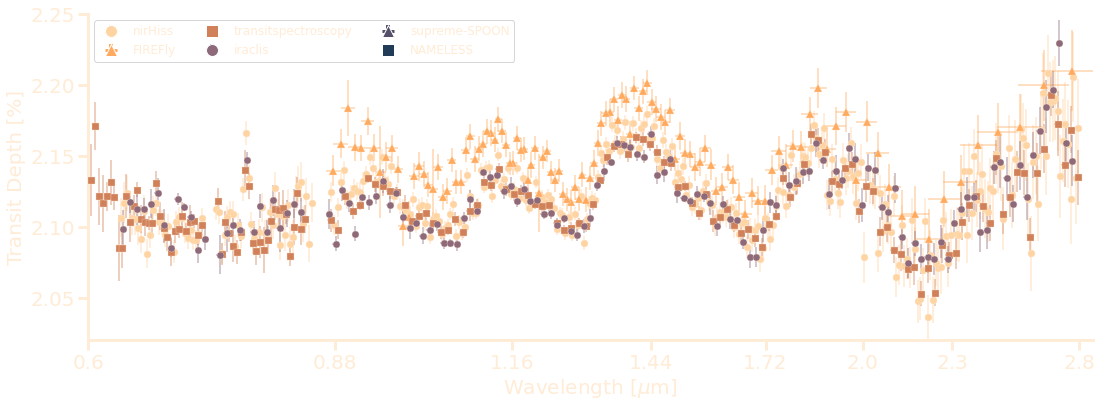

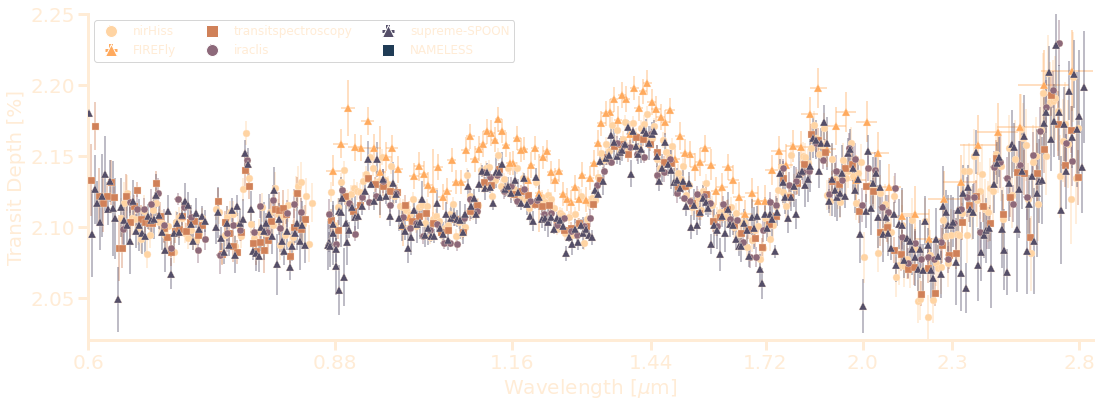

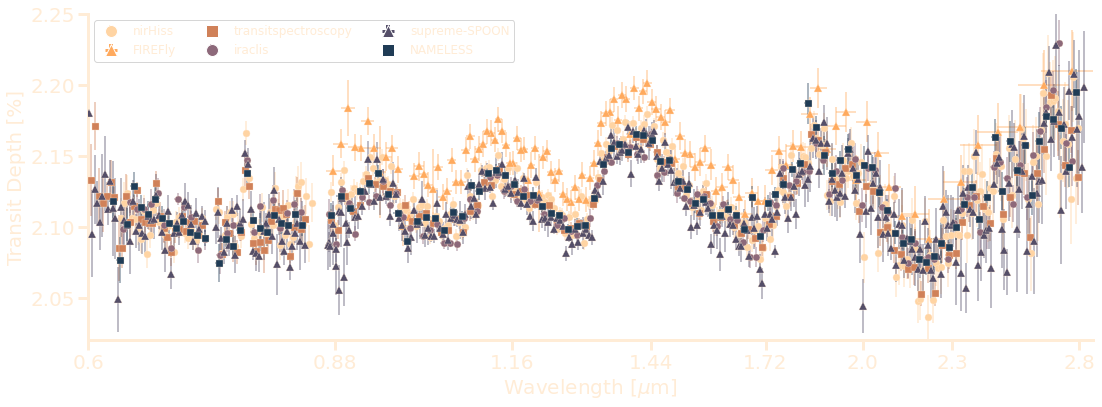

In [3]:
# set the reference model file
ref_file = './data/Main_Models/model_reference.txt'
ref = convolve_model(ref_file)

# Defines the order for which pipelines will be plotted
pipelineorder = ['CMADF', 'ZR', 'NE', 'AT',  'MCR', 'LPC']

for x in range(1,len(pipelineorder)+1):

    # Creates the figure environment
    fig, ax = plt.subplots(nrows=1, figsize=(18,6),
                                        sharex=True, sharey=True)
    fig.set_facecolor('w')

    cutends = 15
    for a in [ax]:
        a.plot(ref[0][cutends:-cutends], ref[1][cutends:-cutends]*1e2,
                lw=2,c='w', zorder=100)



    # Set alpha value, zorder, and marker shape for each plotted spectrum
    alpha = np.full(len(pipelineorder), 0.6)
    zorder = [5, 4, 3, 5, 4 , 3]
    shapes = ['o', '^', 's', 'o', '^', 's']

    for i in range(len(pipelineorder[:x])):
        fn = pipeline_dict[pipelineorder[i]]['filename']
        tab = Table.read(os.path.join('./data/ts', fn), format='csv', comment='#')

        color = custom_colors[i]#pipeline_dict[pipelineorder[i]]['color']
        label = pipeline_dict[pipelineorder[i]]['name']

        for order in [1,2]:

            if order==2:
                q = (tab['quality'] == 0) & (tab['order'] == order)
                label=''
            else:
                q = tab['wave'] > 0.87
                label=label


            if shapes[i] == '^':
                ms = 8
            else:
                ms = 7

            ax.errorbar(tab['wave'][q], tab['dppm'][q]/1e4,
                       yerr=tab['dppm_err'][q]/1e4,
                       xerr=tab['wave_error'][q],
                       markeredgecolor=COLOR, color=color,
                       ecolor=color,
                       linestyle='', marker=shapes[i], ms=ms,
                       alpha=0.5, markeredgewidth=0.3)

            ax.errorbar(tab['wave'][q], tab['dppm'][q]/1e4,
                       markeredgecolor=COLOR, color=color,
                       ecolor=color, markeredgewidth=0.3, alpha=1,
                       linestyle='', marker=shapes[i], ms=ms, zorder=10)


    for i in range(len(pipelineorder)):
        color = custom_colors[i]#pipeline_dict[pipelineorder[i]]['color']
        ax.errorbar(tab['wave'][q], tab['dppm'][q]/1000,
                         yerr=tab['dppm_err'][q]/1000,
                         xerr=np.full(len(tab[q]),0.002),
                         markeredgecolor='w', color=color,
                         ecolor=color,
                         linestyle='', marker=shapes[i],
                         label=pipeline_dict[pipelineorder[i]]['name'],
                         ms=12, lw=4, markeredgewidth=1)


    # Sets the x and y labels
    plt.xlabel('Wavelength [$\mu$m]')
    #ax1.set_ylabel('transit depth [%]')
    ax.set_ylabel('Transit Depth [%]')
    #ax3.set_ylabel('transit depth [%]')


    # Sets the x-limit, x-scale, and x-ticks
    plt.xscale('log')
    plt.xlim(0.6,2.86)
    xticks = np.append(np.linspace(0.6,2,6), np.linspace(2.3,2.8,2))
    xticks = np.round(xticks,2)
    plt.xticks(xticks, labels=np.round(xticks,2))

    # Sets the y-limit
    plt.ylim(2.02,2.25)
    plt.yticks(np.arange(2.05,2.3,0.05))

    # Creates the legends for each subplot
    for a in [ax]:
        leg = a.legend(loc="upper left",
                         ncol=3, #mode="expand", borderaxespad=0.,
                         fontsize=12)

        for legobj in leg.legendHandles:
            legobj.set_linewidth(3.0)

    plt.subplots_adjust(hspace=0.1)
    plt.minorticks_off()

    plt.savefig('/Users/belugawhale/Documents/niriss_real/wasp39/aas_figures/transmission_spectra_{}.png'.format(x),
                dpi=200, rasterize=True,
                transparent=True,
                bbox_inches='tight')

14.466074352965482
5.7461338726136795
2.8744966933348146
1.7568133010516012
25.70479292622791
1.2663331157337312


/var/folders/9s/jb487nv52hs8n0q5ftmb1lk80000gn/T/ipykernel_55084/2636122187.py:117: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('/Users/belugawhale/Documents/niriss_real/wasp39/aas_figures/transmission_spectra.png',


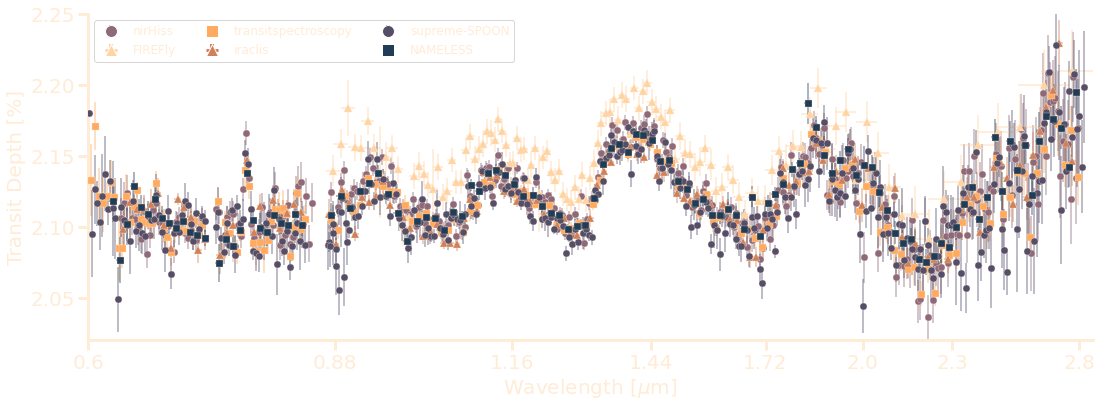

In [12]:
# set the reference model file
ref_file = './data/Main_Models/model_reference.txt'
ref = convolve_model(ref_file)

# Defines the order for which pipelines will be plotted
pipelineorder = ['CMADF', 'ZR', 'NE', 'AT',  'MCR', 'LPC']

x = 7

# Creates the figure environment
fig, ax = plt.subplots(nrows=1, figsize=(18,6),
                                    sharex=True, sharey=True)
fig.set_facecolor('w')

cutends = 15
#for a in [ax]:
#    a.plot(ref[0][cutends:-cutends], ref[1][cutends:-cutends]*1e2,
#            lw=2,c='w', zorder=100)

interp_model = interp1d(ref[0][cutends:-cutends],
                        ref[1][cutends:-cutends]*1e2)

# Set alpha value, zorder, and marker shape for each plotted spectrum
alpha = np.full(len(pipelineorder), 0.6)
zorder = [5, 4, 3, 5, 4 , 3]
shapes = ['o', '^', 's', '^', 'o', 's']

for i in range(len(pipelineorder)):
    fn = pipeline_dict[pipelineorder[i]]['filename']
    tab = Table.read(os.path.join('./data/ts', fn), 
                     format='csv', comment='#')

    color = custom_colors[i]
    label = pipeline_dict[pipelineorder[i]]['name']
    
    x, y = np.array([]), np.array([])

    for order in [1,2]:

        if order==2:
            q = (tab['quality'] == 0) & (tab['order'] == order)
            label=''
        else:
            q = tab['wave'] > 0.87
            label=label


        if shapes[i] == '^':
            ms = 8
        else:
            ms = 7
            
        ax.errorbar(tab['wave'][q], tab['dppm'][q]/1e4,
                   yerr=tab['dppm_err'][q]/1e4,
                   xerr=tab['wave_error'][q],
                   markeredgecolor=COLOR, color=color,
                   ecolor=color,
                   linestyle='', marker=shapes[i], ms=ms,
                   alpha=0.5, markeredgewidth=0.3)
        
        x = np.append(x, tab['wave'][q])
        y = np.append(y, tab['dppm'][q]/1e4)

        ax.errorbar(tab['wave'][q], tab['dppm'][q]/1e4,
                   markeredgecolor=COLOR, color=color,
                   ecolor=color, markeredgewidth=0.3, alpha=1,
                   linestyle='', marker=shapes[i], ms=ms, zorder=10)
    argsort = np.argsort(x)
    x, y = x[argsort], y[argsort]
    num = (y - interp_model(x))**2.0
    denom = interp_model(x)
    print(np.nansum(num/denom)*len(x))


for i in range(len(pipelineorder)):
    color = custom_colors[i]
    ax.errorbar(tab['wave'][q], tab['dppm'][q]/1000,
                     yerr=tab['dppm_err'][q]/1000,
                     xerr=np.full(len(tab[q]),0.002),
                     markeredgecolor='w', color=color,
                     ecolor=color,
                     linestyle='', marker=shapes[i],
                     label=pipeline_dict[pipelineorder[i]]['name'],
                     ms=12, lw=4, markeredgewidth=1)


# Sets the x and y labels
plt.xlabel('Wavelength [$\mu$m]')
#ax1.set_ylabel('transit depth [%]')
ax.set_ylabel('Transit Depth [%]')
#ax3.set_ylabel('transit depth [%]')


# Sets the x-limit, x-scale, and x-ticks
plt.xscale('log')
plt.xlim(0.6,2.86)
xticks = np.append(np.linspace(0.6,2,6), np.linspace(2.3,2.8,2))
xticks = np.round(xticks,2)
plt.xticks(xticks, labels=np.round(xticks,2))

# Sets the y-limit
plt.ylim(2.02,2.25)
plt.yticks(np.arange(2.05,2.3,0.05))

# Creates the legends for each subplot
for a in [ax]:
    leg = a.legend(loc="upper left",
                     ncol=3, #mode="expand", borderaxespad=0.,
                     fontsize=12)

    for legobj in leg.legendHandles:
        legobj.set_linewidth(3.0)

plt.subplots_adjust(hspace=0.1)
plt.minorticks_off()

plt.savefig('/Users/belugawhale/Documents/niriss_real/wasp39/aas_figures/transmission_spectra.png',
            dpi=200, rasterize=True,
            transparent=True,
            bbox_inches='tight')

In [14]:
# Load in the HST data from Wakeford + 2018
hst = Table.read('/Users/belugawhale/Documents/GitHub/wasp39b_paper/data/ts/WASP-39b_Wakeford_2018_AJ.csv', 
                 format='csv',
                 comment='#')
hst_err = np.sqrt(2) * hst['Rp/R*'] * hst['Rp/R* error'] * 100 # propagates err

/var/folders/9s/jb487nv52hs8n0q5ftmb1lk80000gn/T/ipykernel_55084/220992346.py:61: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('/Users/belugawhale/Documents/niriss_real/wasp39/aas_figures/hubble.png',


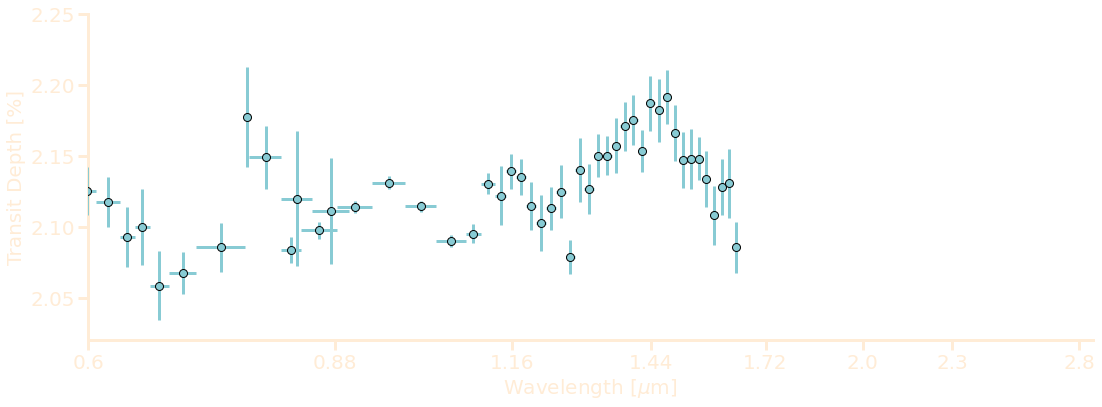

In [25]:
# set the reference model file
ref_file = './data/Main_Models/model_reference.txt'
ref = convolve_model(ref_file)

# Defines the order for which pipelines will be plotted
pipelineorder = ['CMADF', 'ZR', 'NE', 'AT',  'MCR', 'LPC']

x = 7

# Creates the figure environment
fig, ax = plt.subplots(nrows=1, figsize=(18,6),
                                    sharex=True, sharey=True)
fig.set_facecolor('w')

cutends = 15
#for a in [ax]:
#    a.plot(ref[0][cutends:-cutends], ref[1][cutends:-cutends]*1e2,
#            lw=2,c='w', zorder=100)

interp_model = interp1d(ref[0][cutends:-cutends],
                        ref[1][cutends:-cutends]*1e2)

# Set alpha value, zorder, and marker shape for each plotted spectrum
alpha = np.full(len(pipelineorder), 0.6)
zorder = [5, 4, 3, 5, 4 , 3]
shapes = ['o', '^', 's', '^', 'o', 's']

    
ax.errorbar(hst['Wavelength microns'],
             hst['Rp/R*']**2*100,
             yerr=hst_err*np.sqrt(2),
             xerr=hst['Wavelength bin size microns'],
             marker='o', linestyle='', ms=8,
             markeredgecolor='k', ecolor='#88cbd4',
             color='#88cbd4', lw=3, markeredgewidth=1,
             zorder=100, label='HST (Wakeford+2018)')


# Sets the x and y labels
plt.xlabel('Wavelength [$\mu$m]')
#ax1.set_ylabel('transit depth [%]')
ax.set_ylabel('Transit Depth [%]')
#ax3.set_ylabel('transit depth [%]')


# Sets the x-limit, x-scale, and x-ticks
plt.xscale('log')
plt.xlim(0.6,2.86)
xticks = np.append(np.linspace(0.6,2,6), np.linspace(2.3,2.8,2))
xticks = np.round(xticks,2)
plt.xticks(xticks, labels=np.round(xticks,2))

# Sets the y-limit
plt.ylim(2.02,2.25)
plt.yticks(np.arange(2.05,2.3,0.05))


plt.subplots_adjust(hspace=0.1)
plt.minorticks_off()
a
plt.savefig('/Users/belugawhale/Documents/niriss_real/wasp39/aas_figures/hubble.png',
            dpi=200, rasterize=True,
            transparent=True,
            bbox_inches='tight')

No handles with labels found to put in legend.


14.466074352965482


/var/folders/9s/jb487nv52hs8n0q5ftmb1lk80000gn/T/ipykernel_55084/3451809868.py:106: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('/Users/belugawhale/Documents/niriss_real/wasp39/aas_figures/nirhiss_fit.png',


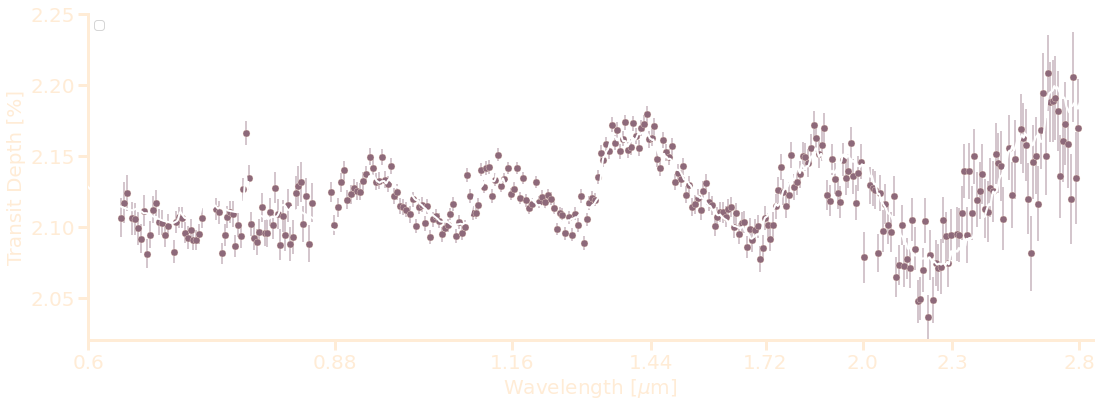

In [13]:
# set the reference model file
ref_file = './data/Main_Models/model_reference.txt'
ref = convolve_model(ref_file)

# Defines the order for which pipelines will be plotted
pipelineorder = ['CMADF', 'ZR', 'NE', 'AT',  'MCR', 'LPC']

x = 7

# Creates the figure environment
fig, ax = plt.subplots(nrows=1, figsize=(18,6),
                                    sharex=True, sharey=True)
fig.set_facecolor('w')

cutends = 15
for a in [ax]:
    a.plot(ref[0][cutends:-cutends], ref[1][cutends:-cutends]*1e2,
            lw=2,c='w', zorder=100)

interp_model = interp1d(ref[0][cutends:-cutends],
                        ref[1][cutends:-cutends]*1e2)

# Set alpha value, zorder, and marker shape for each plotted spectrum
alpha = np.full(len(pipelineorder), 0.6)
zorder = [5, 4, 3, 5, 4 , 3]
shapes = ['o', '^', 's', '^', 'o', 's']

for i in range(1):
    fn = pipeline_dict[pipelineorder[i]]['filename']
    tab = Table.read(os.path.join('./data/ts', fn), 
                     format='csv', comment='#')

    color = custom_colors[i]
    label = pipeline_dict[pipelineorder[i]]['name']
    
    x, y = np.array([]), np.array([])

    for order in [1,2]:

        if order==2:
            q = (tab['quality'] == 0) & (tab['order'] == order)
            label=''
        else:
            q = tab['wave'] > 0.87
            label=label


        if shapes[i] == '^':
            ms = 8
        else:
            ms = 7
            
        ax.errorbar(tab['wave'][q], tab['dppm'][q]/1e4,
                   yerr=tab['dppm_err'][q]/1e4,
                   xerr=tab['wave_error'][q],
                   markeredgecolor=COLOR, color=color,
                   ecolor=color,
                   linestyle='', marker=shapes[i], ms=ms,
                   alpha=0.5, markeredgewidth=0.3)
        
        x = np.append(x, tab['wave'][q])
        y = np.append(y, tab['dppm'][q]/1e4)

        ax.errorbar(tab['wave'][q], tab['dppm'][q]/1e4,
                   markeredgecolor=COLOR, color=color,
                   ecolor=color, markeredgewidth=0.3, alpha=1,
                   linestyle='', marker=shapes[i], ms=ms, zorder=10)
    argsort = np.argsort(x)
    x, y = x[argsort], y[argsort]
    num = (y - interp_model(x))**2.0
    denom = interp_model(x)
    print(np.nansum(num/denom)*len(x))



# Sets the x and y labels
plt.xlabel('Wavelength [$\mu$m]')
#ax1.set_ylabel('transit depth [%]')
ax.set_ylabel('Transit Depth [%]')
#ax3.set_ylabel('transit depth [%]')


# Sets the x-limit, x-scale, and x-ticks
plt.xscale('log')
plt.xlim(0.6,2.86)
xticks = np.append(np.linspace(0.6,2,6), np.linspace(2.3,2.8,2))
xticks = np.round(xticks,2)
plt.xticks(xticks, labels=np.round(xticks,2))

# Sets the y-limit
plt.ylim(2.02,2.25)
plt.yticks(np.arange(2.05,2.3,0.05))

# Creates the legends for each subplot
for a in [ax]:
    leg = a.legend(loc="upper left",
                     ncol=3, #mode="expand", borderaxespad=0.,
                     fontsize=12)

    for legobj in leg.legendHandles:
        legobj.set_linewidth(3.0)

plt.subplots_adjust(hspace=0.1)
plt.minorticks_off()

plt.savefig('/Users/belugawhale/Documents/niriss_real/wasp39/aas_figures/nirhiss_fit.png',
            dpi=200, rasterize=True,
            transparent=True,
            bbox_inches='tight')

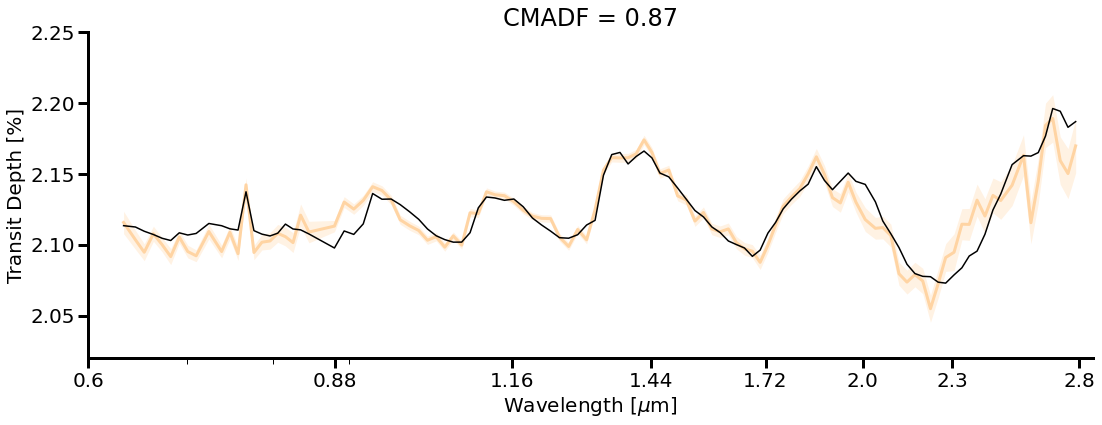

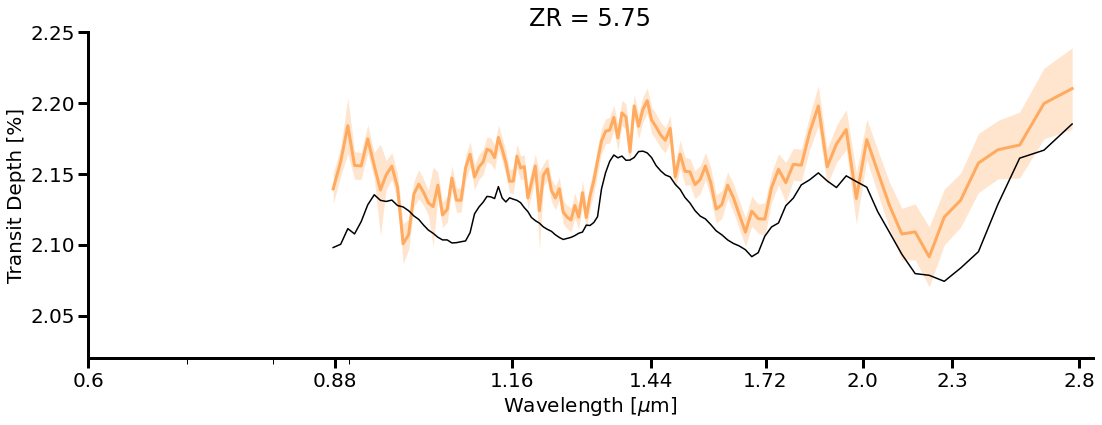

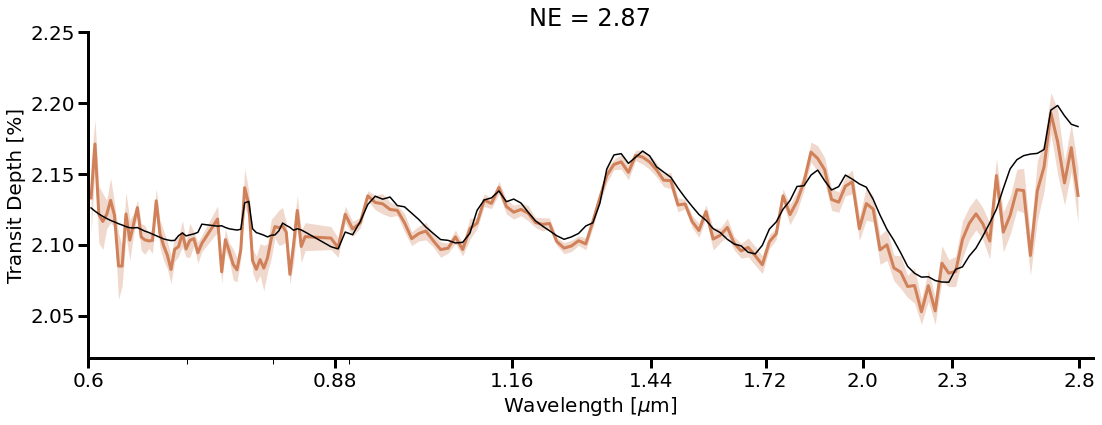

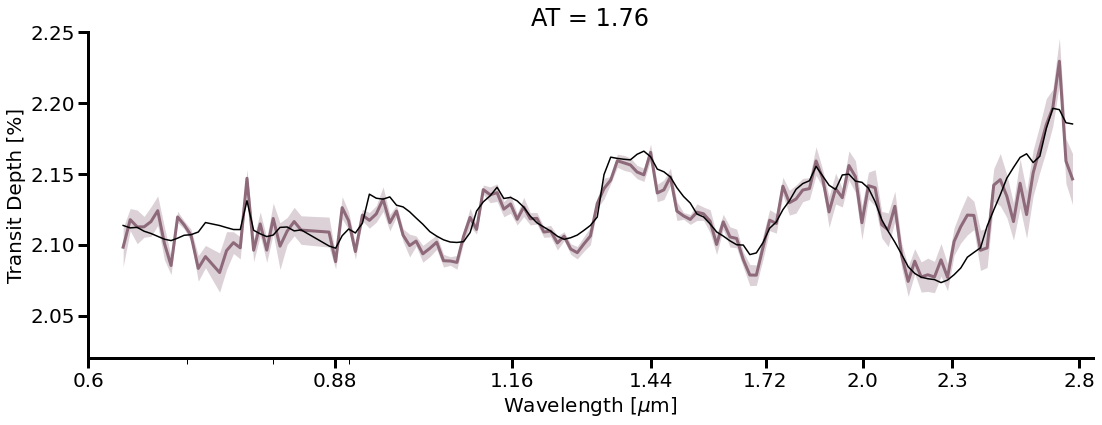

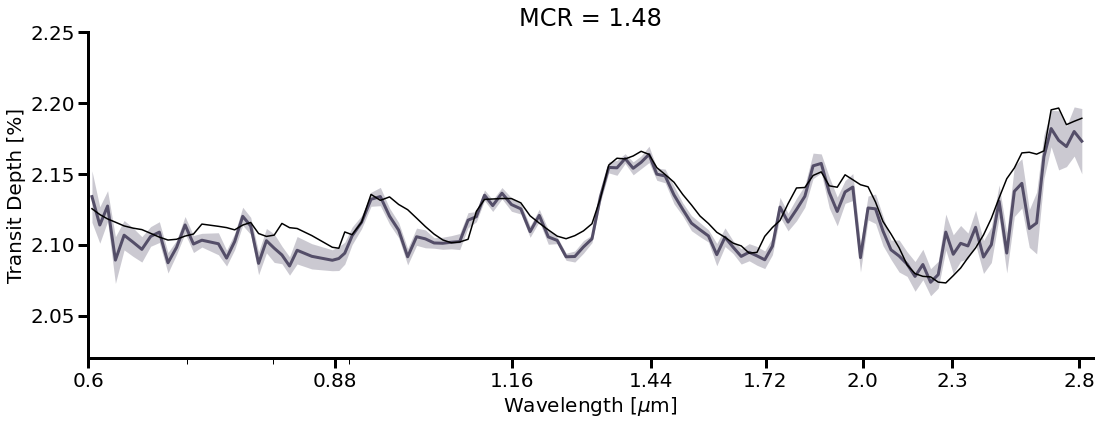

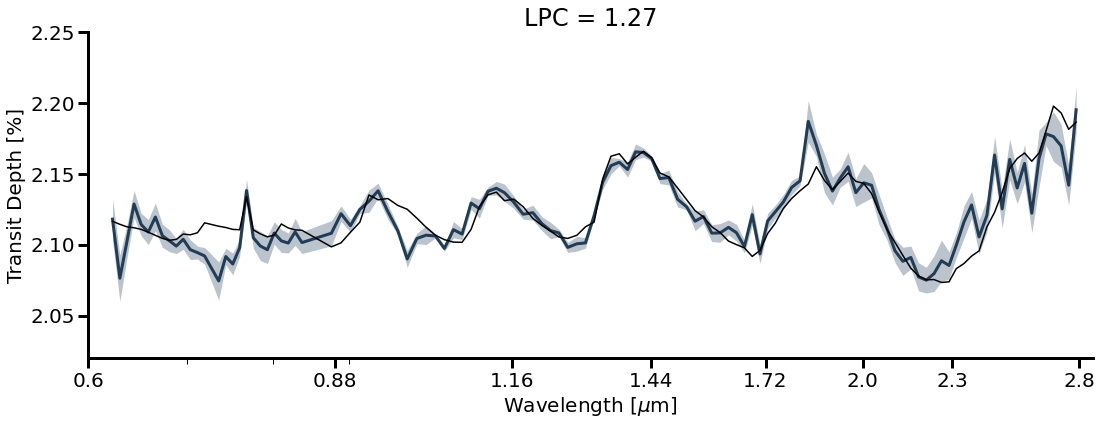

In [13]:
# set the reference model file
ref_file = './data/Main_Models/model_reference.txt'
ref = convolve_model(ref_file)

# Defines the order for which pipelines will be plotted
pipelineorder = ['CMADF', 'ZR', 'NE', 'AT',  'MCR', 'LPC']

x = 7

# Set alpha value, zorder, and marker shape for each plotted spectrum
alpha = np.full(len(pipelineorder), 0.6)
zorder = [5, 4, 3, 5, 4 , 3]
shapes = ['o', '^', 's', '^', 'o', 's']


for i in range(len(pipelineorder)):
    # Creates the figure environment
    fig, ax = plt.subplots(nrows=1, figsize=(18,6),
                                        sharex=True, sharey=True)
    fig.set_facecolor('w')

    cutends = 15
    interp_model = interp1d(ref[0][cutends:-cutends],
                            ref[1][cutends:-cutends]*1e2)

    fn = pipeline_dict[pipelineorder[i]]['filename']
    tab = Table.read(os.path.join('./data/ts', fn), 
                     format='csv', comment='#')

    color = custom_colors[i]
    label = pipeline_dict[pipelineorder[i]]['name']
    
    x, y, yerr = np.array([]), np.array([]), np.array([])

    for order in [1,2]:

        if order==2:
            q = (tab['quality'] == 0) & (tab['order'] == order)
            label=''
        else:
            q = tab['wave'] > 0.87
            label=label


        if shapes[i] == '^':
            ms = 8
        else:
            ms = 7
            
        
        x = np.append(x, tab['wave'][q])
        y = np.append(y, tab['dppm'][q]/1e4)
        yerr = np.append(yerr, tab['dppm_err'][q]/1e4)


        
    argsort = np.argsort(x)
    x, y, yerr = x[argsort], y[argsort], yerr[argsort]
    
    if pipelineorder[i]=='CMADF' or pipelineorder[i]=='MCR':
        x, y, yerr, xerr = bin_at_resolution(x, y, 
                                             yerr, 
                                             np.ones(len(x)), 
                                             R = 150)
    
    plt.plot(x, y, color=color, lw=3)
    plt.fill_between(x, y-yerr, y+yerr, color=color,
                     lw=0, alpha=0.3)
    plt.plot(x, interp_model(x), 'k')
    
    num = (y - interp_model(x))**2.0
    denom = interp_model(x)
    chisq = np.nansum(num/denom)*len(x)

    plt.title('{0} = {1}'.format(pipelineorder[i],
                                 np.round(chisq,2)))

    # Sets the x and y labels
    plt.xlabel('Wavelength [$\mu$m]')
    #ax1.set_ylabel('transit depth [%]')
    ax.set_ylabel('Transit Depth [%]')
    #ax3.set_ylabel('transit depth [%]')


    # Sets the x-limit, x-scale, and x-ticks
    plt.xscale('log')
    plt.xlim(0.6,2.86)
    xticks = np.append(np.linspace(0.6,2,6), np.linspace(2.3,2.8,2))
    xticks = np.round(xticks,2)
    plt.xticks(xticks, labels=np.round(xticks,2))

    # Sets the y-limit
    plt.ylim(2.02,2.25)
    plt.yticks(np.arange(2.05,2.3,0.05))